In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
from sklearn.feature_extraction import text
import numpy as np
from PIL import Image

In [5]:
df_bolsonaro = pd.read_csv('extracoes/extracao_28_09_bolsonaro.csv', index_col=0)

Data_post                   ID  \
256413  2022-08-20T20:34:00Z  1561089419045736448   
403769  2022-09-29T21:02:00Z  1575591976954605568   
279788  2022-09-30T17:56:00Z  1575907570035802114   
406260  2022-09-29T20:36:00Z  1575585451703881729   
412734  2022-08-18T22:03:00Z  1560387048300756993   
...                      ...                  ...   
320078  2022-09-30T11:08:00Z  1575804896296816640   
106622  2022-10-01T23:09:00Z  1576348719321997312   
1474    2022-08-19T00:14:00Z  1560419985750499328   
416710  2022-09-29T18:50:00Z  1575558758314364929   
296408  2022-09-30T15:08:00Z  1575865280147984384   

                                                    Texto Eh_RT  
256413    @VeraMaria1930 Tamo junto Bolsonaro com certeza     N  
403769  Sempre que perguntam em quem irei votar eu fal...     N  
279788  silêncio que a petista que quebrou a quarenten...     N  
406260  Vazaram imagens de bolsonaro domingo 18 horas....     N  
412734  @jairbolsonaro Bolsonaro tentou agredir um jov...     N  
...                                                   ...   ...  
320078  O Bonner comeu o C* do Bolsonaro tão gostoso o...     N  
106622  @teodoro_aragao E por óbvio, bolsonaro e Lula ...     N  
1474                   @LeisaSantana41 RGS🇧🇷22 Bolsonaro✅     N  
416710  @RoLuchsinger @LulaOficial "Jeguiciata", era s...     N  
296408  Aliás, Bolsonaro, cadê as provas que você diss...     N  

[37447 rows x 4 columns]

In [6]:
df_lula = pd.read_csv('extracoes/extracao_28_09_lula.csv', index_col=0)

Data_post                   ID  \
64282   2022-10-02T06:15:00Z  1576455900453560321   
391453  2022-09-29T23:01:00Z  1575621940902916099   
312861  2022-09-30T12:15:00Z  1575821754618236928   
395785  2022-09-29T22:17:00Z  1575610868875739137   
285308  2022-08-21T01:24:00Z  1561162414481186817   
...                      ...                  ...   
316917  2022-08-21T07:00:00Z  1561246956021751808   
403690  2022-09-29T20:57:00Z  1575590725160677376   
11956   2022-10-02T14:59:00Z  1576587806985441280   
121387  2022-10-01T20:38:00Z  1576310732689670144   
21960   2022-10-02T13:19:00Z  1576562631363551235   

                                                    Texto Eh_RT  
64282                            vai dar lula hoje !!!!!!     N  
391453  @iS2wone @hooncaralho @sunooleite EU MANDEI NO...     N  
312861             @Fenafisco Portanto, não votem no Lula     N  
395785  @rennatodutra @_Janoninho @brazilianred3 Lula ...     N  
285308  @Yurinitto @updatecharts @Anitta @MissyElliott...     N  
...                                                   ...   ...  
316917  AO VIVO: GLElSl FOI PEGA- GUEDES PEGA M0RAES- ...     N  
403690  Kkkk perco td com esses idiota falando dos tri...     N  
11956   Seus burro todo mundo sabe que o Bolsonaro não...     N  
121387  Lula, Alckmin e Haddad conversam com a imprens...     N  
21960        LULA PRESIDENTE HOJE https://t.co/1wWADC4nAX     N  

[48944 rows x 4 columns]

In [7]:
df_ciro = pd.read_csv('extracoes/extracao_28_09_ciro.csv', index_col=0)

Data_post                   ID  \
208850  2022-09-30T19:55:00Z  1575937389150732316   
57047   2022-10-02T03:44:00Z  1576417903540256768   
156411  2022-10-01T08:45:00Z  1576131161155305473   
116229  2022-10-01T17:33:00Z  1576263983228923904   
216386  2022-09-30T18:38:00Z  1575918032806985746   
...                      ...                  ...   
131087  2022-10-01T15:00:00Z  1576225505262833666   
211547  2022-09-30T19:27:00Z  1575930466921840641   
24502   2022-10-02T12:54:00Z  1576556189340819456   
208447  2022-09-30T19:59:00Z  1575938464490536961   
307803  2022-09-30T01:42:00Z  1575662440058322944   

                                                    Texto Eh_RT  
208850  @MirSou6 @Clogmia_based @MazitaChaves @choquei...     N  
57047   @MauricioRicardo O que foi que o Ciro fez dess...     N  
156411  Antonio Tebet larga o ‘equivocado’ Ciro e decl...     N  
116229  Pra Simone Ciro já perdeu cuidado pra que ele ...     N  
216386  @viniciusmalak Votar no Ciro é colocar Bolsona...     N  
...                                                   ...   ...  
131087  @diegohenrique35 @folha A campanha de Ciro tem...     N  
211547  @Ticostacruz Votarei em ciro e será minha últi...     N  
24502   @jgprates @sensacionalista  Poxa até em Paris ...     N  
208447  @rafael_queirozz @TiagoWilliamQ @APrimeiraVia ...     N  
307803  Ver o Ciro pulando com os 2 pés no peito do Lu...     N  

[32481 rows x 4 columns]

In [8]:
df_simone = pd.read_csv('extracoes/extracao_28_09_simone.csv', index_col=0)

Data_post                   ID  \
115004  2022-09-29T12:02:00Z  1575455906464256002   
50157   2022-09-30T13:52:00Z  1575846025230942208   
113828  2022-09-29T12:47:00Z  1575467393551327233   
2721    2022-10-02T13:30:00Z  1576565269534605312   
101319  2022-09-29T19:20:00Z  1575566192290340864   
...                      ...                  ...   
63913   2022-09-30T09:33:00Z  1575780835340341248   
116406  2022-09-29T11:08:00Z  1575442301094076416   
101182  2022-09-29T19:24:00Z  1575567162550329344   
116153  2022-09-29T11:17:00Z  1575444700869312512   
141357  2022-08-20T00:23:00Z  1560784627710791680   

                                                    Texto Eh_RT  
115004  This Tweet from @ParanaUrubu has been withheld...     N  
50157   A Simone Tebet prometendo pagar 5mil pra quem ...     N  
113828  Alguém viu ou ouviu o Ciro Gomes, a Simone Teb...     N  
2721    Candidatos a Eleição Brasil \n\nFelipe d'avila...     N  
101319  This Tweet from @SilviaN92165417 has been with...     N  
...                                                   ...   ...  
63913             simone tebet é uma milfzinha do caralho     N  
116406  Vice da Simone tebet afirma que Lula  mandou m...     N  
101182  Entre os que votam em Lula, 93% querem o fim d...     N  
116153  This Tweet from @OdilonVillela has been withhe...     N  
141357   minha mãe chamando a Simone tebet de Simone #TBT     N  

[4224 rows x 4 columns]

In [54]:
dias = sorted(df_bolsonaro['Data_post'].str[:10].unique())

In [55]:
cont1=[]
cont2=[]
cont3=[]
cont4=[]

for dia in dias:
    cont1.append(len(df_bolsonaro[df_bolsonaro['Data_post'].str[:10]==dia]))
    cont2.append(len(df_lula[df_lula['Data_post'].str[:10]==dia]))
    cont3.append(len(df_simone[df_simone['Data_post'].str[:10]==dia]))
    cont4.append(len(df_ciro[df_ciro['Data_post'].str[:10]==dia]))
    

In [57]:
df_cont_dias = pd.DataFrame(data={'bolsonaro': cont1,
                   'lula': cont2,
                  'simone': cont3,
                  'ciro': cont4}, index=dias)

df_cont_dias

bolsonaro    lula  simone    ciro
2022-08-16      59905   66352    1468   14222
2022-08-17      69038   59648    1324    8990
2022-08-18      65922   59029     771    9312
2022-08-19      70276   61762    1288   10671
2022-08-20      67086   64281     788   10747
2022-08-21      59653   72274     598    9397
2022-09-28      30430   30371    2744   22011
2022-09-29     139011  134125   30416   95292
2022-09-30     142207  142116   63829  132761
2022-10-01     141877  141198   17391  106107
2022-10-02     101033  100574   10545   78556

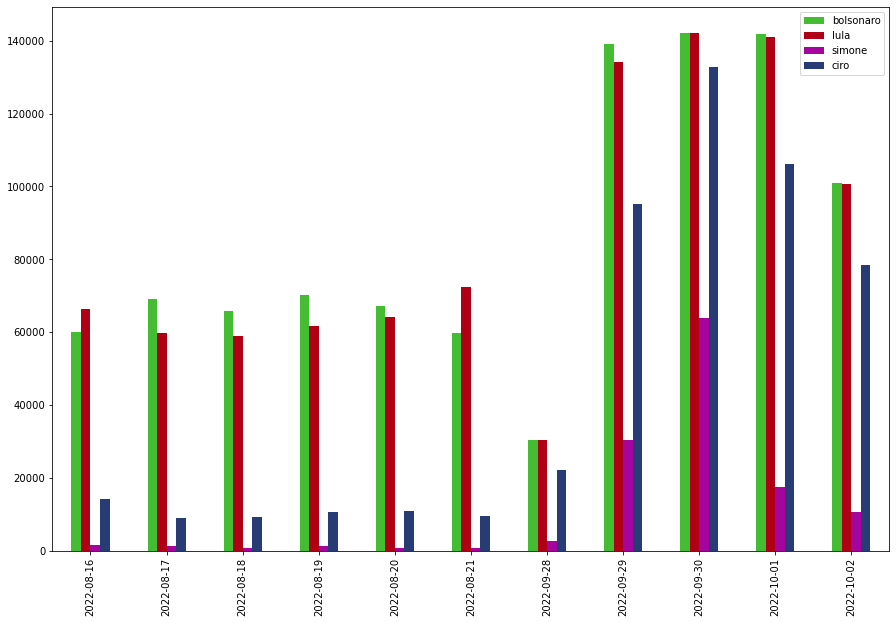

In [79]:
df_cont_dias.plot( kind="bar", figsize=(15, 10), color=['#44bd32','#AF0016','#A4059F','#273c75'])
 
# print bar graph
plt.show()

In [ ]:
horarios = sorted(df_bolsonaro['Data_post'].str[:13].unique())
cont1=[]
cont2=[]
cont3=[]
cont4=[]

for horario in horarios:
    cont1.append(len(df_bolsonaro[df_bolsonaro['Data_post'].str[:13]==horario]))
    cont2.append(len(df_lula[df_lula['Data_post'].str[:13]==horario]))
    cont3.append(len(df_simone[df_simone['Data_post'].str[:13]==horario]))
    cont4.append(len(df_ciro[df_ciro['Data_post'].str[:13]==horario]))
df_cont_horarios = pd.DataFrame(data={'bolsonaro': cont1,
                   'lula': cont2,
                  'simone': cont3,
                  'ciro': cont4}, index=horarios)

df_cont_horarios.index = df_cont_horarios.index.str[5:]

In [ ]:
df_cont_horarios.plot( figsize=(15, 10), color=['#44bd32','#AF0016','#A4059F','#273c75'],marker='o', fontsize=16)
plt.xticks(range(0,len(df_cont_horarios.index),22), df_cont_horarios.index.str[:5].unique())
plt.show()

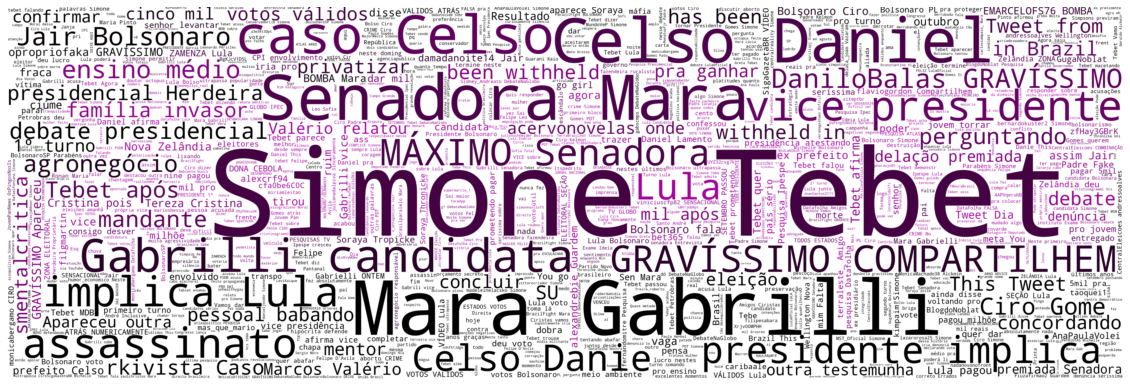

In [58]:
text = " ".join(i for i in df_simone.Texto)
mask = np.array(Image.open("3.PNG"))
#stop = set(stopwords.words("portuguese")+['rt','RT','tô','tá','https','http','vc', 'hithheld'])
wordcloud = WordCloud(stopwords=stop, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(text)
image_colors = ImageColorGenerator(mask)
plt.figure( figsize=[20,20])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.savefig("Simone_Cloud.png", format="png")
plt.show()

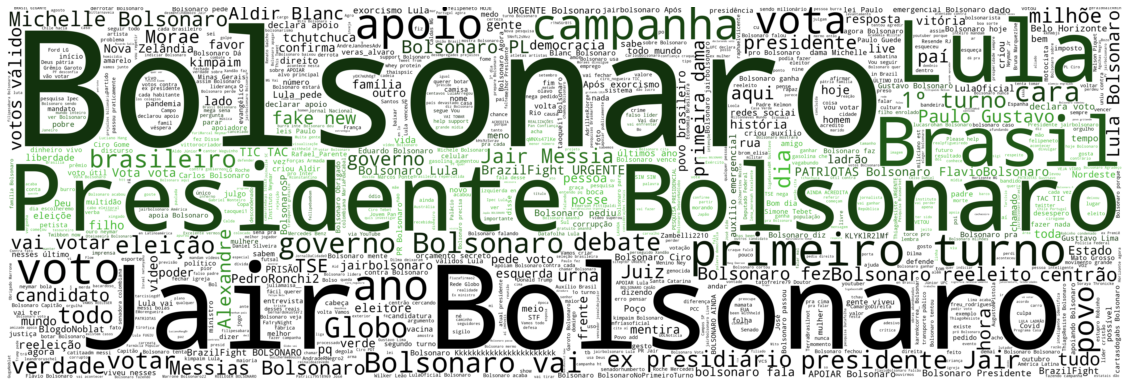

In [57]:
text = " ".join(i for i in df_bolsonaro.Texto)
mask = np.array(Image.open("1.PNG"))
#stop = set(stopwords.words("portuguese")+['rt','RT','tô','tá','https','http','vc', 'hithheld'])
wordcloud = WordCloud(stopwords=stop, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(text)
image_colors = ImageColorGenerator(mask)
plt.figure( figsize=[20,20])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.savefig("Bolsonaro_Cloud.png", format="png")
plt.show()

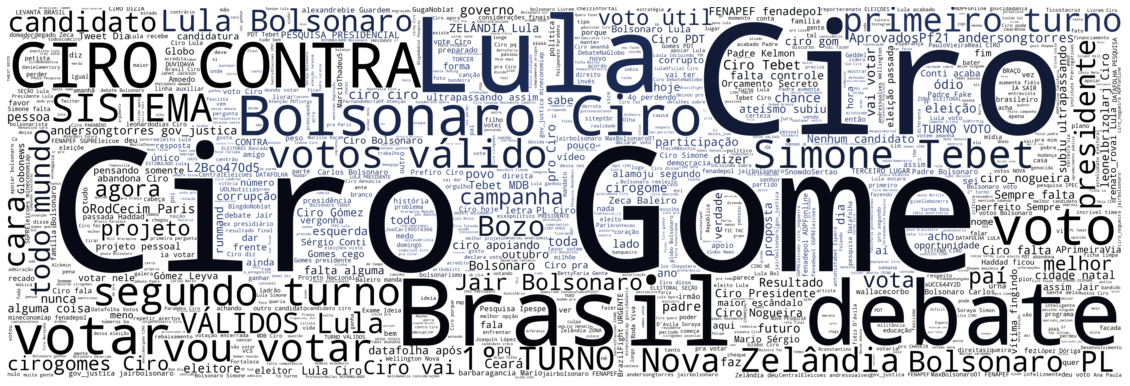

In [55]:
text = " ".join(i for i in df_ciro.Texto)
mask = np.array(Image.open("4.PNG"))
#stop = set(stopwords.words("portuguese")+['rt','RT','tô','tá','https','http','vc', 'hithheld'])
wordcloud = WordCloud(stopwords=stop, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(text)
image_colors = ImageColorGenerator(mask)
plt.figure( figsize=[20,20])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.savefig("Ciro_Cloud.png", format="png")
plt.show()

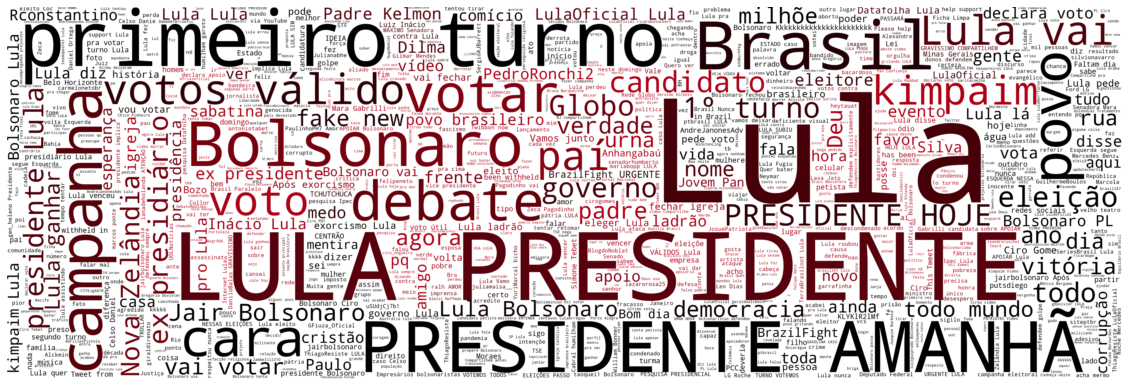

In [56]:
text = " ".join(i for i in df_lula.Texto)
mask = np.array(Image.open("2.PNG"))
#stop = set(stopwords.words("portuguese")+['rt','RT','tô','tá','https','http','vc', 'hithheld'])
wordcloud = WordCloud(stopwords=stop, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(text)
image_colors = ImageColorGenerator(mask)
plt.figure( figsize=[20,20])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.savefig("Lula_Cloud.png", format="png")
plt.show()

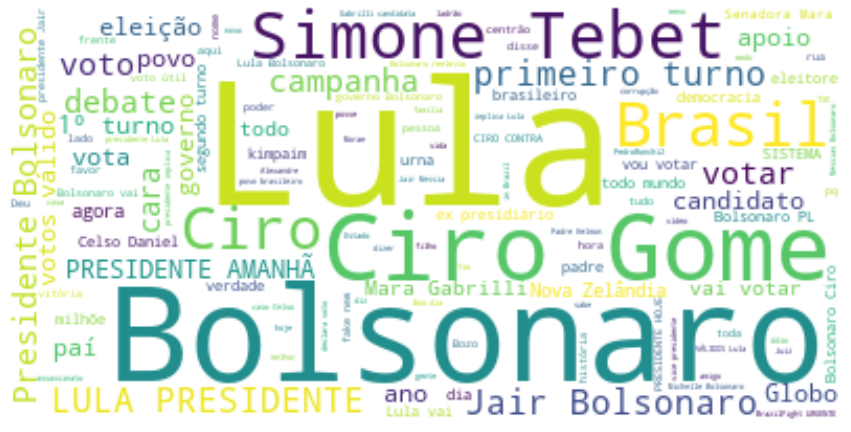

In [14]:
df_todos = df_bolsonaro.append(df_lula)
df_todos = df_todos.append(df_simone)
df_todos = df_todos.append(df_ciro)
df_todos = df_todos.drop_duplicates()

text = " ".join(i for i in df_todos.Texto)
wordcloud = WordCloud(stopwords=stop, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [32]:
df_lula.Texto.str.extractall(r'(\#\w+)')[0].value_counts()

#LulaNo1ºTurno         10228
#LulaPresidente13       6001
#DebateNaGlobo          4413
#Eleicoes2022           3582
#BrasilDaEsperança      3400
                       ...  
#Geek                      1
#Gamer                     1
#Kawaii                    1
#Japan                     1
#JoaoRomaGovernador        1
Name: 0, Length: 7832, dtype: int64

In [31]:
df_bolsonaro.Texto.str.extractall(r'(\#\w+)')[0].value_counts()

#BolsonaroNoPrimeiroTurno    12137
#DebateNaGlobo                6535
#Bolsonaro22                  5879
#Bolsonaro                    3403
#Vote22Bolsonaro              2484
                             ...  
#LulaDesgraçaDoBrasil            1
#SabáticoJR                      1
#RodrigoGarciaDemitido           1
#PrefiroCiroP                    1
#JoaoRomaGovernador              1
Name: 0, Length: 7309, dtype: int64

In [29]:
df_simone.Texto.str.extractall(r'(\#\w+)')[0].value_counts()

#DebateNaGlobo             3809
#VÍDEO                     1631
#OsPingosNosIs              454
#Eleicoes2022               343
#DebatenaGlobo              254
                           ... 
#SorayanoBBB23                1
#vgn                          1
#DebatePresidencial2022       1
#BolsoCiro                    1
#LulaNuncaMa                  1
Name: 0, Length: 837, dtype: int64

In [30]:
df_ciro.Texto.str.extractall(r'(\#\w+)')[0].value_counts()

#DebateNaGlobo       7786
#1                   5322
#CiroPresidente12    4618
#CiroNoRodaViva      1929
#PrefiroCiro         1677
                     ... 
#vida                   1
#padre                  1
#sonhei                 1
#GOLOUD                 1
#cirogames              1
Name: 0, Length: 3664, dtype: int64

In [37]:
hashtags = df_todos.Texto.str.extractall(r'(\#\w+)')[0].value_counts()
hashtags

#DebateNaGlobo               20999
#BolsonaroNoPrimeiroTurno    12989
#LulaNo1ºTurno               11623
#LulaPresidente13             6107
#Bolsonaro22                  6092
                             ...  
#gilmagermano                    1
#joaoazevedo                     1
#MabComLula                      1
#datafolhamente                  1
#NoMeuVotoNinguemMex             1
Name: 0, Length: 13690, dtype: int64

In [67]:
hashtags_lula = df_lula.Texto.str.extractall(r'(\#\w+)')[0].value_counts()
hashtags_lula[:50]

#LulaNo1ºTurno                  10228
#LulaPresidente13                6001
#DebateNaGlobo                   4413
#Eleicoes2022                    3582
#BrasilDaEsperança               3400
#Lula                            2909
#Eleições2022                    2729
#Lula13                          2688
#LulaArregou                     2577
#LulaNaGlobo                     2488
#BrasilDaEsperanca               2487
#LulaNoPrimeiroTurno             2471
#LulaNoPrimeiroTurno13           2346
#Twibbon                         2215
#LulaLadraoSeuLugarENaPrisao     1845
#LulaEoPTtudoNoPrimeiroTurno     1800
#Vote13                          1772
#luladay                         1285
#LulaPresidente                  1150
#lula                            1138
#Debate                          1078
#EquipeLula                       995
#LulaDay                          947
#BolsonaroNoPrimeiroTurno         927
#LulaPeloBrasilHaddadPorSP        918
#g1                               892
#Bolsonaro  

In [66]:
hashtags_bolsonaro = df_bolsonaro.Texto.str.extractall(r'(\#\w+)')[0].value_counts()
hashtags_bolsonaro[:50]

#BolsonaroNoPrimeiroTurno            12137
#DebateNaGlobo                        6535
#Bolsonaro22                          5879
#Bolsonaro                            3403
#Vote22Bolsonaro                      2484
#BolsonaroReeleitoEm2022              2249
#LulaArregou                          2128
#Twibbon                              2035
#BolsonaroReeleito                    1913
#Eleicoes2022                         1761
#Eleições2022                         1681
#LulaNo1ºTurno                        1438
#LulaLadraoSeuLugarENaPrisao          1302
#EuVotoBolsonaro22                    1185
#Bolsonaro2022                        1184
#BolsonaroNoPrimeiroTurno22           1179
#bolsonaro                            1137
#Vote22                               1104
#LulaPresidente13                     1035
#BolsonaroReeleito2022                 977
#g1                                    974
#ForaBolsonaro                         943
#Brasil                                784
#VoteBolson

In [65]:
hashtags_simone = df_simone.Texto.str.extractall(r'(\#\w+)')[0].value_counts()
hashtags_simone[:50]

#DebateNaGlobo               3809
#VÍDEO                       1631
#OsPingosNosIs                454
#Eleicoes2022                 343
#DebatenaGlobo                254
#SimonePresidente15           159
#Eleições2022                 118
#Debate                       112
#LulaNo1ºTurno                 94
#LulaNaGlobo                   60
#HeadlineNews                  60
#JG                            59
#D                             58
#Lula                          55
#debatenaglobo                 53
#LulaPresidente13              51
#BolsonaroNoPrimeiroTurno      50
#SimoneTebet                   48
#LulaNoPrimeiroTurno13         40
#GloboNews                     39
#Simone15                      37
#BrasilDaEsperança             36
#CentraldasEleições            36
#GloboLixo                     33
#eleicoes2022                  32
#1                             32
#SimonePresidente              31
#Vote13                        31
#Virada15                      30
#Brasil       

In [143]:
hashtags_simone

#DebateNaGlobo             3809
#VÍDEO                     1631
#OsPingosNosIs              454
#Eleicoes2022               343
#DebatenaGlobo              254
                           ... 
#SorayanoBBB23                1
#vgn                          1
#DebatePresidencial2022       1
#BolsoCiro                    1
#LulaNuncaMa                  1
Name: 0, Length: 837, dtype: int64

In [69]:
hashtags_ciro = df_ciro.Texto.str.extractall(r'(\#\w+)')[0].value_counts()
hashtags_ciro[:50]

#DebateNaGlobo               7786
#1                           5322
#CiroPresidente12            4618
#CiroNoRodaViva              1929
#PrefiroCiro                 1677
#CiroContraOSistema          1558
#Eleicoes2022                1371
#ConvocaTodosPF2021          1301
#PrefiroCiro12               1170
#LulaNo1ºTurno               1154
#Ciro12                      1096
#VotaNoCiro                  1051
#Somos1300                    959
#CiroNoSegundoTurno           874
#PorMaisPapiloscopistasPF     850
#RodaViva                     847
#JesusMurilloKaram            734
#LulaNaGlobo                  729
#CiroNoSBT                    699
#Eleições2022                 640
#somos1300                    566
#EuVotoBolsonaro22            526
#Ciro                         510
#PrefiroCiroPresidente12      470
#prefirociro                  456
#CentraldasEleições           423
#UOLEleicoes2022              387
#UOLEleicoes                  373
#CiroPresidente               350
#DebateNGlobo 

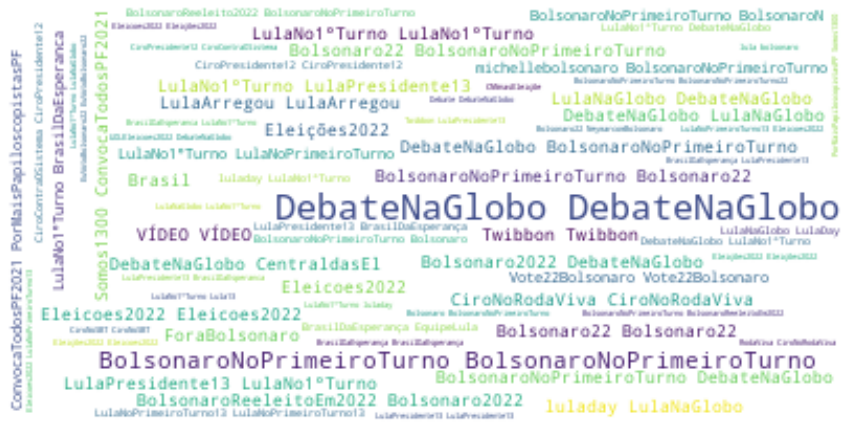

In [36]:
text = " ".join(i for i in df_todos.Texto.str.extractall(r'(\#\w+)')[0])
wordcloud = WordCloud( background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()